# 1. Setup

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Dataset

In [4]:
data = pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# 3. Data Exploration

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Observation:**  
- `total_bedrooms` has 207 null values, which is approximately 1% of the data. So, we can just drop them.

In [6]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

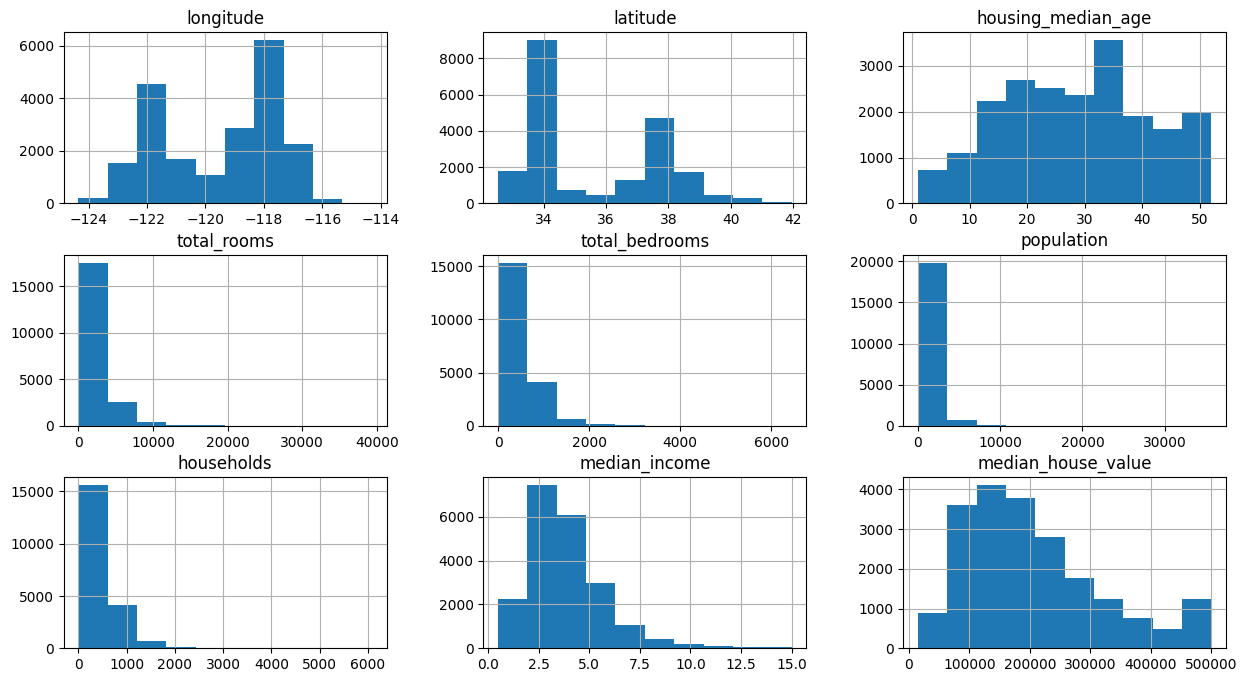

In [7]:
data.hist(figsize=(15,8))

**Observation:**  
- Most histograms are right screwed

<Axes: >

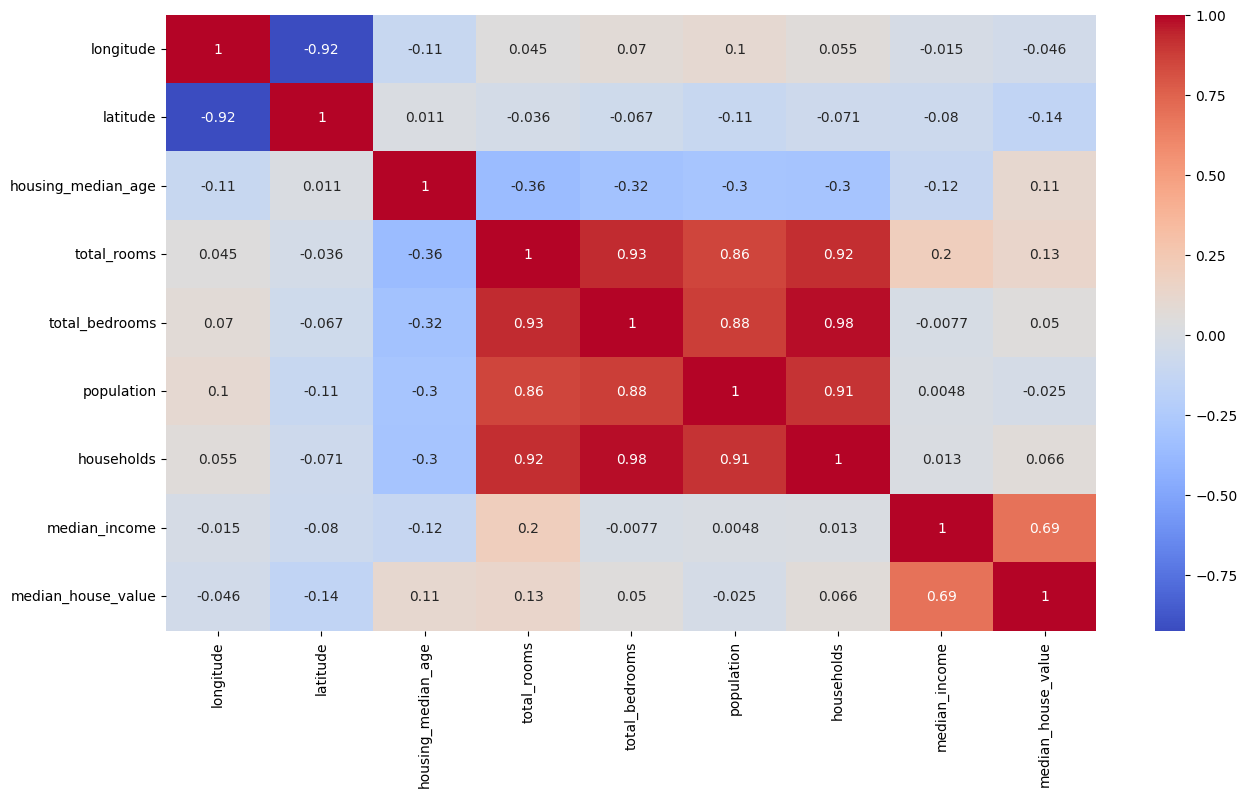

In [8]:
plt.figure(figsize=(15,8))
sns.heatmap(data.select_dtypes(include='number').corr(),annot=True,cmap='coolwarm')

**Observation:**  
- `median_income` and the target `median_house_value` have a strong correlation.

# 4. Data Preprocessing

In [9]:
# Train Test Validation split
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
train_data = X_train.join(y_train)

train_data = train_data.dropna()

# log normal tranformation for the right sckewed columns
train_data['total_rooms'] = np.log1p(train_data['total_rooms'])
train_data['total_bedrooms'] = np.log1p(train_data['total_bedrooms'])
train_data['population'] = np.log1p(train_data['population'])
train_data['households'] = np.log1p(train_data['households'])

train_data.hist(figsize=(15,8))

<class 'pandas.core.frame.DataFrame'>
Index: 14448 entries, 7061 to 15795
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14448 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [12]:
train_data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     6413
INLAND        4613
NEAR OCEAN    1797
NEAR BAY      1621
ISLAND           4
Name: count, dtype: int64

In [13]:
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity']).astype(int))

train_data = train_data.drop('ocean_proximity', axis=1)

train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
7061,-118.02,33.93,35.0,7.783641,5.988961,7.105786,6.013715,4.1312,193800.0,1,0,0,0,0
14689,-117.09,32.79,20.0,7.688913,6.282267,6.907755,6.208590,2.8631,169700.0,0,0,0,0,1
17323,-120.14,34.59,24.0,7.379008,5.645447,6.595781,5.655992,4.2026,259800.0,0,0,0,0,1
10056,-121.00,39.26,14.0,6.698268,5.023881,5.713733,4.934474,3.1094,136100.0,0,1,0,0,0
15750,-122.45,37.77,52.0,8.067463,6.563856,7.331060,6.499787,3.3068,500001.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,7.193686,5.308268,6.490724,5.384495,6.3700,229200.0,1,0,0,0,0
11964,-117.43,34.02,33.0,8.034307,6.347389,7.469654,6.109248,3.0500,97800.0,0,1,0,0,0
5390,-118.38,34.03,36.0,7.650645,6.345636,7.471363,6.269096,2.9344,222100.0,1,0,0,0,0
860,-121.96,37.58,15.0,8.182000,6.393591,7.483244,6.327937,5.7192,283500.0,1,0,0,0,0


<Axes: >

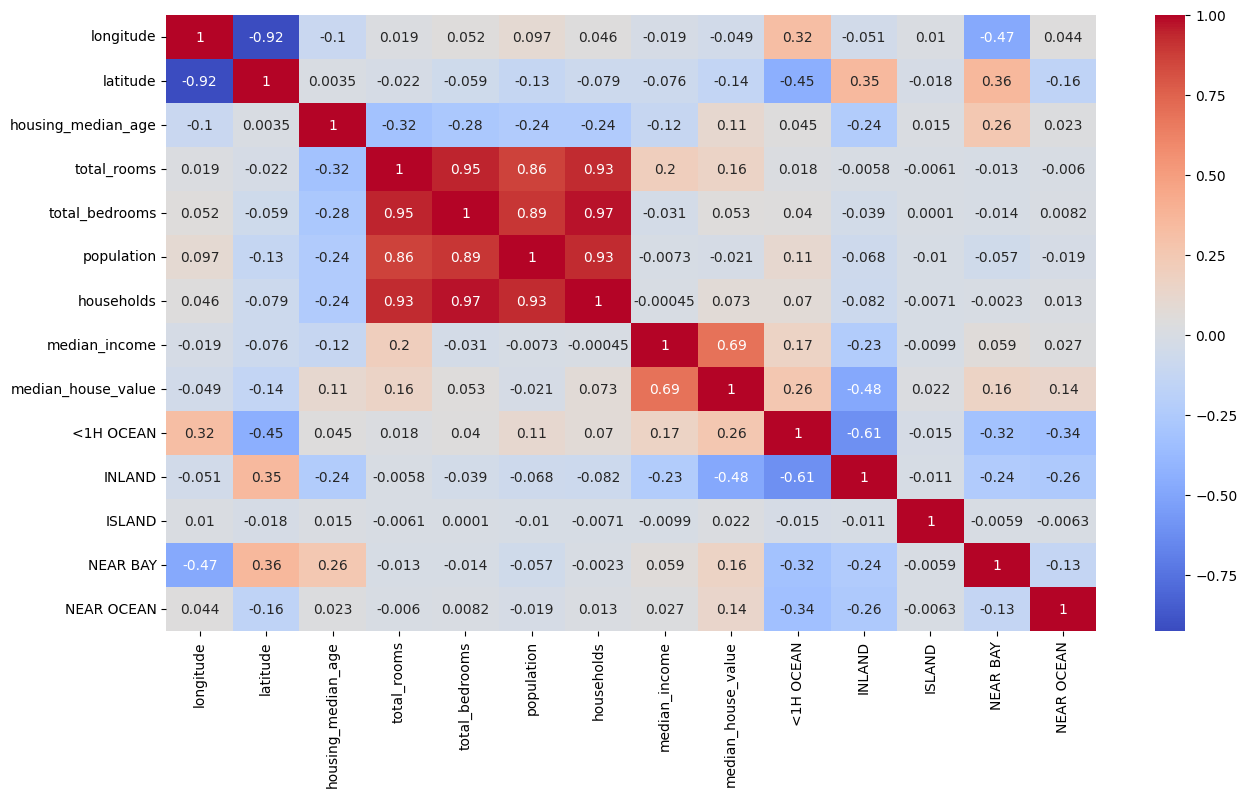

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap='coolwarm')

**Observation:**  
- Now we can see that `<1H Ocean` has high correlation and `inland` has negative correlation with `median_house_value`

<Axes: xlabel='latitude', ylabel='longitude'>

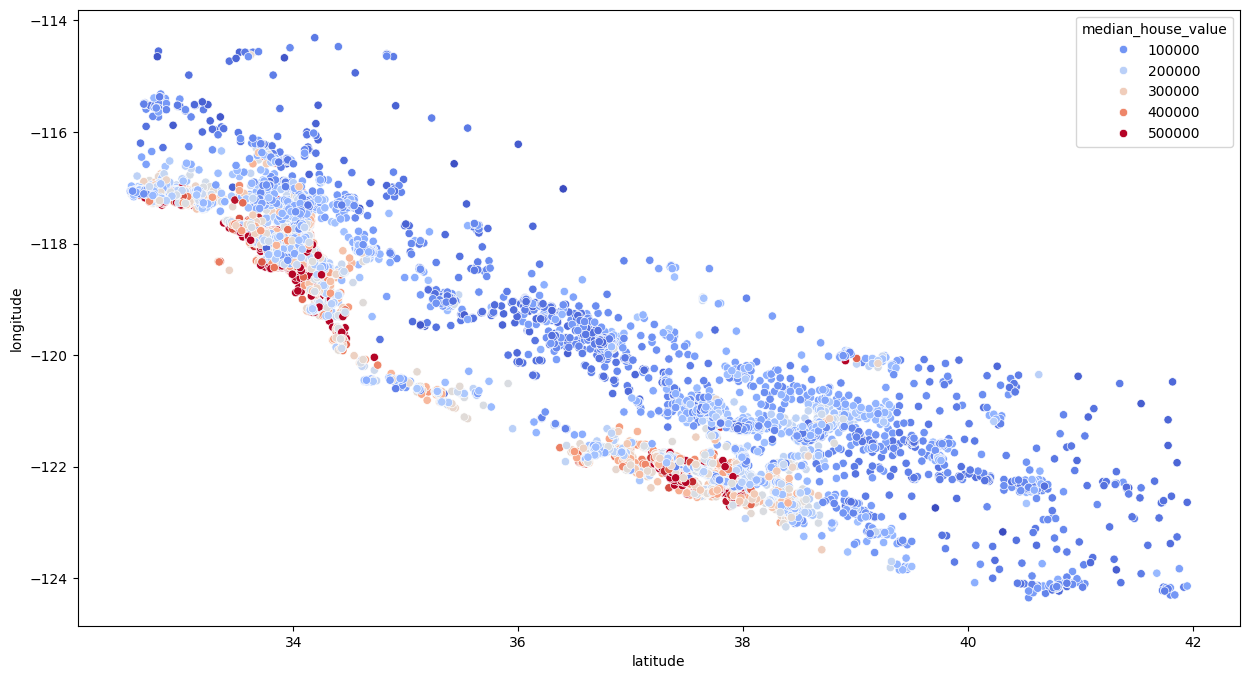

In [15]:
# Since we have the latitue and longitude lets visualize the the speadout
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue = 'median_house_value', palette='coolwarm')

# 5.1 Feature Engineering

In [ ]:
train_data['rooms_per_household'] = np.log1p(train_data['total_rooms']/train_data['households'])
train_data['bedroom_ratio'] = np.log1p(train_data['total_bedrooms']/train_data['total_rooms'])
train_data['population_per_household'] = np.log1p(train_data['population'] / train_data['households'])

In [17]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,bedroom_ratio,population_per_household
7061,-118.02,33.93,35.0,7.783641,5.988961,7.105786,6.013715,4.1312,193800.0,1,0,0,0,0,0.830434,0.832763,0.780057
14689,-117.09,32.79,20.0,7.688913,6.282267,6.907755,6.208590,2.8631,169700.0,0,0,0,0,1,0.805775,0.799266,0.747925
17323,-120.14,34.59,24.0,7.379008,5.645447,6.595781,5.655992,4.2026,259800.0,0,0,0,0,1,0.834923,0.835979,0.772955
10056,-121.00,39.26,14.0,6.698268,5.023881,5.713733,4.934474,3.1094,136100.0,0,1,0,0,0,0.857578,0.847277,0.769145
15750,-122.45,37.77,52.0,8.067463,6.563856,7.331060,6.499787,3.3068,500001.0,0,0,0,1,0,0.807006,0.801586,0.755132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,7.193686,5.308268,6.490724,5.384495,6.3700,229200.0,1,0,0,0,0,0.848440,0.856619,0.790930
11964,-117.43,34.02,33.0,8.034307,6.347389,7.469654,6.109248,3.0500,97800.0,0,1,0,0,0,0.839455,0.817913,0.798714
5390,-118.38,34.03,36.0,7.650645,6.345636,7.471363,6.269096,2.9344,222100.0,1,0,0,0,0,0.797676,0.791024,0.784713
860,-121.96,37.58,15.0,8.182000,6.393591,7.483244,6.327937,5.7192,283500.0,1,0,0,0,0,0.829859,0.824052,0.780504


# 6. Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression

# Split the data again
X_train = train_data.drop(['median_house_value'], axis = 1)
y_train = train_data['median_house_value']

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [19]:
test_data = X_test.join(y_test)

In [20]:
test_data = X_test.join(y_test)

from preprocessing import preprocessing

test_data = preprocessing(test_data)

test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,bedroom_ratio,population_per_household
9658,-120.67,37.37,18.0,5.105945,3.433987,4.653960,3.496508,1.6607,87500.0,0,1,0,0,0,1.460299,1.486885,1.331031
7107,-118.01,33.89,34.0,7.410952,5.680173,6.911747,5.739793,4.6000,203400.0,1,0,0,0,0,1.291153,1.304705,1.204181
18656,-121.97,36.97,15.0,7.955074,6.505784,7.344073,6.368187,2.7587,228600.0,0,0,0,0,1,1.249190,1.222769,1.153244
7278,-118.25,33.98,47.0,6.426488,5.093750,6.626718,4.976734,2.2969,116700.0,1,0,0,0,0,1.291306,1.261642,1.331540
17798,-121.81,37.38,29.0,6.347389,4.343805,5.501258,4.290459,12.3292,416700.0,1,0,0,0,0,1.479419,1.461251,1.282207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17505,-121.90,37.36,47.0,6.915723,5.505332,6.366470,5.484797,2.9545,237500.0,1,0,0,0,0,1.260890,1.256187,1.160749
13512,-117.32,34.11,41.0,7.114769,5.713733,6.902743,5.602119,1.4891,67300.0,0,1,0,0,0,1.270014,1.245205,1.232166
10842,-117.91,33.67,16.0,8.982436,7.730614,8.520189,7.657755,3.5120,218400.0,1,0,0,0,0,1.172985,1.161930,1.112622
16559,-121.28,37.82,10.0,9.127611,7.481556,8.688791,7.422971,3.6500,119400.0,0,1,0,0,0,1.229644,1.220015,1.170527


In [21]:
test_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN', 'rooms_per_household', 'bedroom_ratio',
       'population_per_household'],
      dtype='object')

In [22]:
train_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN', 'rooms_per_household', 'bedroom_ratio',
       'population_per_household'],
      dtype='object')